# Daily temperature Forecastind using Time Series
---

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
train = pd.read_csv('/content/DailyDelhiClimateTrain.csv',index_col=0, parse_dates=True)
test = pd.read_csv('/content/DailyDelhiClimateTest.csv',index_col=0, parse_dates=True)

In [ ]:
train

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762


In [ ]:
train.tail()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2016-12-28,17.217391,68.043478,3.547826,1015.565217
2016-12-29,15.238095,87.857143,6.000000,1016.904762
2016-12-30,14.095238,89.666667,6.266667,1017.904762
2016-12-31,15.052632,87.000000,7.325000,1016.100000
2017-01-01,10.000000,100.000000,0.000000,1016.000000


In [ ]:
train.shape

(1462, 4)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [ ]:
train.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

In [ ]:
train.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [ ]:
train.nunique()

meantemp        617
humidity        897
wind_speed      730
meanpressure    626
dtype: int64

In [ ]:
train.duplicated()

date
2013-01-01    False
2013-01-02    False
2013-01-03    False
2013-01-04    False
2013-01-05    False
              ...  
2016-12-28    False
2016-12-29    False
2016-12-30    False
2016-12-31    False
2017-01-01    False
Length: 1462, dtype: bool

In [ ]:
train.duplicated().sum()

0

In [ ]:
train.isna().any()

meantemp        False
humidity        False
wind_speed      False
meanpressure    False
dtype: bool

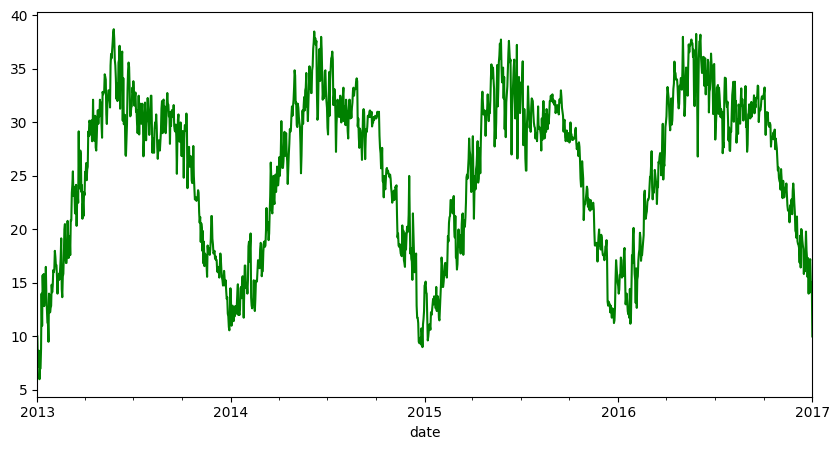

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
train['meantemp'].plot(ax=ax,c='green')
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
# Additive Decomposition
add_result = seasonal_decompose(train['meantemp'], model='additive')

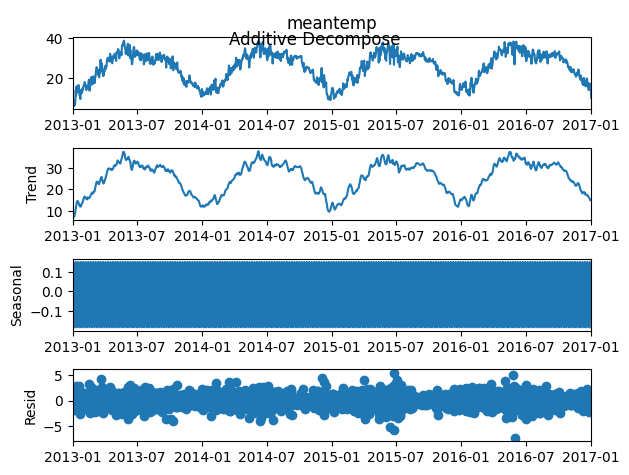

In [ ]:
add_result.plot().suptitle('\nAdditive Decompose', fontsize=12)
plt.show()

In [ ]:
#Additive
new_df_add_meantemp = pd.concat([add_result.seasonal, add_result.trend, add_result.resid, add_result.observed], axis=1)
new_df_add_meantemp.columns = ['seasoanilty', 'trend', 'residual', 'actual_values']
new_df_add_meantemp.head(5:10)

SyntaxError: ignored

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
train['humidity'].plot(ax=ax,c='blue')
plt.show()

In [ ]:
# plot the selected columns
fig, ax = plt.subplots(figsize=(10,5))
train['wind_speed'].plot(ax=ax,c='skyblue')
plt.show()

In [ ]:
# plot the selected columns
fig, ax = plt.subplots(figsize=(10,5))
train['meanpressure'].plot(ax=ax)
plt.show()

<Axes: >

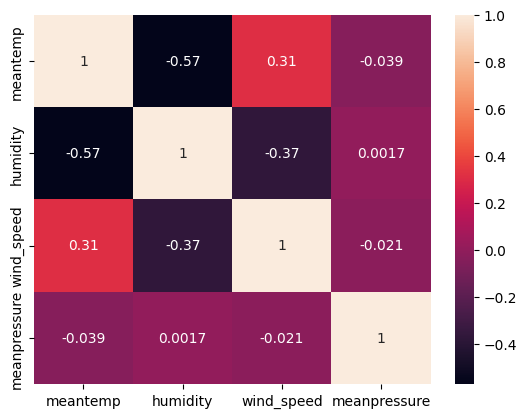

In [ ]:
corr=train.corr()
import seaborn as sns
sns.heatmap(corr,annot=True)

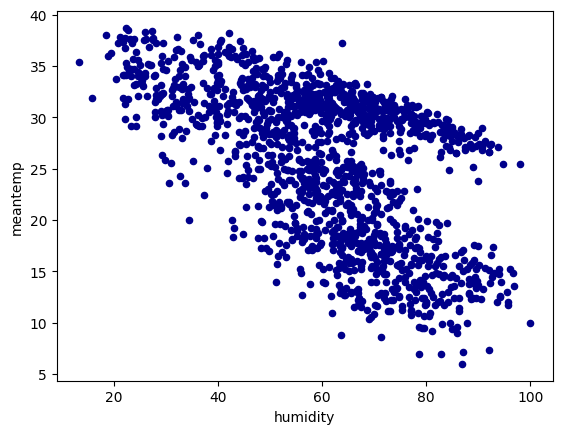

In [ ]:
ax1 = train.plot.scatter(x='humidity',
                      y='meantemp',
                       c='DarkBlue')

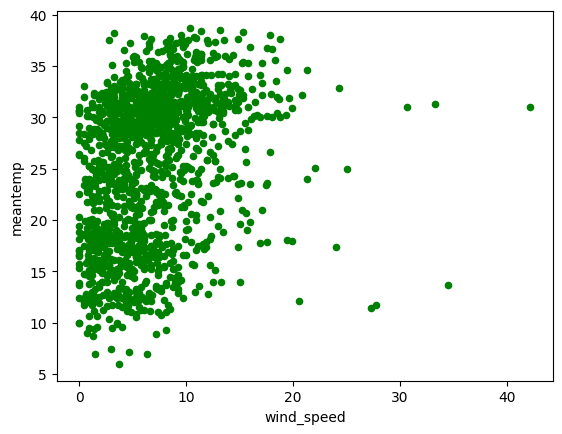

In [ ]:
ax2 = train.plot.scatter(x='wind_speed',
                      y='meantemp',
                       c='green')

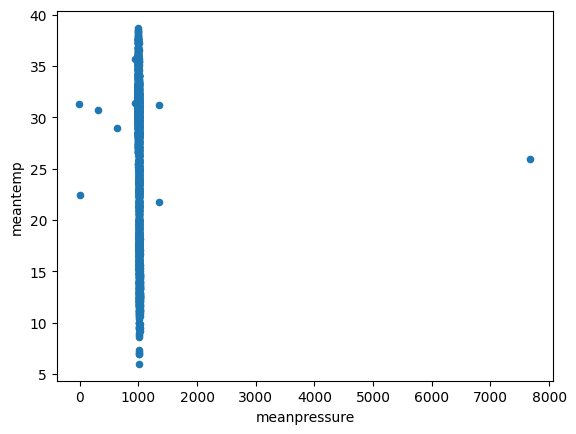

In [ ]:
ax2 = train.plot.scatter(x='meanpressure',
                      y='meantemp')

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

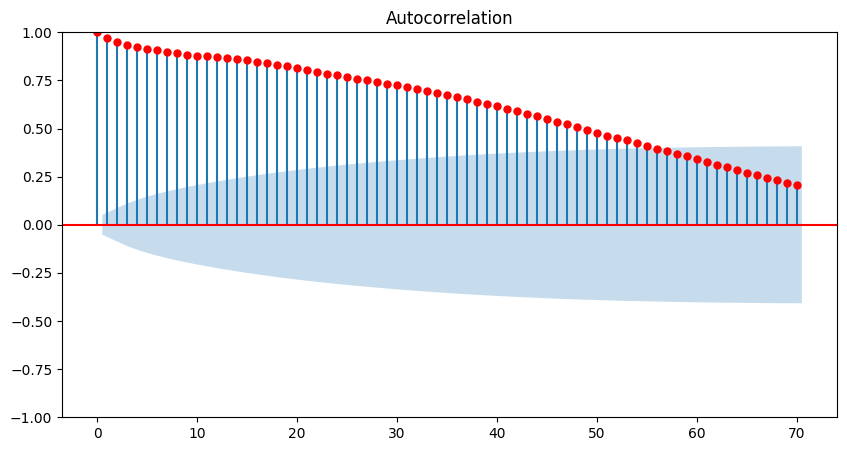

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(train['meantemp'], lags=70, ax=ax,c='red')
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


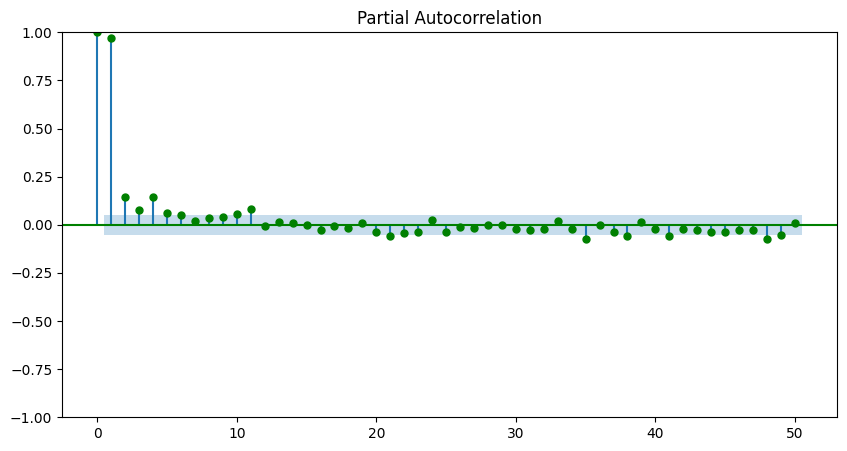

In [ ]:

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(train['meantemp'], lags=50, ax=ax,c='green')
plt.show();

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(series, signif=0.05, name='', verbose=False):


    result = adfuller(series.values)
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [ ]:
# ADF Test on each column
for name, column in train.iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

<ipython-input-26-78901580d4da>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in train.iteritems():


    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -2.021069
p-value: 0.277412
Non-stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -3.675577
p-value: 0.004470
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -3.838097
p-value: 0.002541
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -38.078590
p-value: 0.000000
Stationary




In [ ]:
# ADF Test on each column
for name, column in train.diff().dropna().iteritems():
    check_stationarity(column, name=column.name)
    print('\n')

<ipython-input-27-c1bedf13c267>:2: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, column in train.diff().dropna().iteritems():


    Augmented Dickey-Fuller Test on "meantemp" 
    -----------------------------------------------
ADF Statistic: -16.378720
p-value: 0.000000
Stationary


    Augmented Dickey-Fuller Test on "humidity" 
    -----------------------------------------------
ADF Statistic: -12.683532
p-value: 0.000000
Stationary


    Augmented Dickey-Fuller Test on "wind_speed" 
    -----------------------------------------------
ADF Statistic: -12.837720
p-value: 0.000000
Stationary


    Augmented Dickey-Fuller Test on "meanpressure" 
    -----------------------------------------------
ADF Statistic: -12.945640
p-value: 0.000000
Stationary




In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 22.2 MB/s eta 0:00:00


In [ ]:
from pmdarima.arima import auto_arima

# perform grid search
arima_model = auto_arima(train['meantemp'],X=train.drop(columns=['meanpressure']),max_p=10,max_q=10,test='adf',trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-30957.092, Time=1.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-30966.818, Time=0.53 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-30963.139, Time=0.57 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-30964.714, Time=0.93 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-30968.818, Time=0.45 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-30961.282, Time=1.21 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0]          
Total fit time: 5.185 seconds


In [ ]:
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1462
Model:                        SARIMAX   Log Likelihood               15488.409
Date:                Tue, 30 May 2023   AIC                         -30968.818
Time:                        19:27:45   BIC                         -30947.668
Sample:                    01-01-2013   HQIC                        -30960.928
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
meantemp       1.0000    3.7e-22    2.7e+21      0.000       1.000       1.000
humidity   -8.001e-17   7.05e-22  -1.14e+05      0.000      -8e-17      -8e-17
wind_speed  1.772e-16   1.01e-22   1.75e+06      0.0

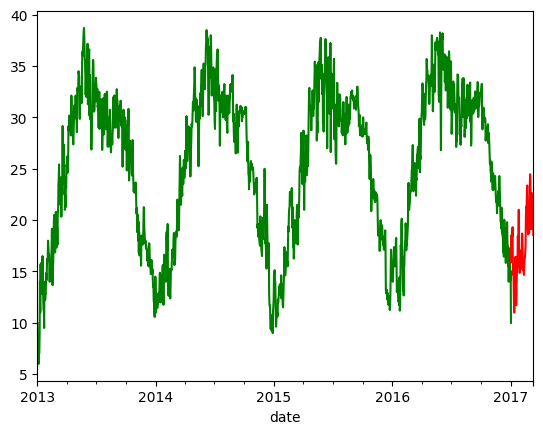

In [ ]:
train['meantemp'].plot(c='green')
test['meantemp'].plot(c='red')
plt.show()

In [ ]:
predictions = arima_model.predict(n_periods=len(test),X=test.drop(columns=['meanpressure']),test='adf',trace=True)
predictions

2017-01-02    15.913043
2017-01-03    18.500000
2017-01-04    17.111111
2017-01-05    18.700000
2017-01-06    18.388889
                ...    
2017-04-21    34.500000
2017-04-22    34.250000
2017-04-23    32.900000
2017-04-24    32.875000
2017-04-25    32.000000
Freq: D, Length: 114, dtype: float64

In [ ]:
import plotly.express as px

# Create a dataframe with original data and forecasted values
forecast_df = pd.concat([test], axis=0)
forecast_df['Forecast'] = predictions

# Create the plot
fig = px.line(forecast_df, x=forecast_df.index, y=['Forecast'])
fig.add_scatter(x=test.index, y=test.meantemp, mode='lines', name='Test')
fig.update_layout(title='ARIMA Forecast', xaxis_title='Date', yaxis_title='meantemp',template='plotly_dark')
fig.show()


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error

In [ ]:
mape=mean_absolute_percentage_error(test['meantemp'], predictions)
print("Mean Absolute Percentage Error", mape)
print("="*50)
mse=mean_squared_error(test['meantemp'], predictions)
print("Mean Squared Error",mse)
print("="*50)
print("RMSE", (mse)**0.5)
print("="*50)

Mean Absolute Percentage Error 4.677050206748255e-16
Mean Squared Error 1.5766146372417134e-28
RMSE 1.2556331618915269e-14
